Objetivo: Verificar se as pessoas compraram ou não compraram os produtos

In [3]:
import pandas as pd

In [ ]:
#pip install pandas

In [5]:
df=pd.read_csv('Social_Network_Ads.csv',sep=',')#importa a base de dados

In [6]:
df.head()#exibe as primeiras linhas do Dataframe

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [7]:
colunas ={'User ID': 'Usuario',
          'Gender': 'Genero',
          'Age':'Idade',
          'EstimatedSalary':'Salario esperado',
          'Purchased': 'Comprou'
          }

In [8]:
df.rename(columns=colunas,inplace=True)#renomeia as colunas

In [10]:
df.head()

,Usuario,Genero,Idade,Salario esperado,Comprou
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


Importando as bibliotecas necessarias para realizar a ánalise de dados

In [44]:
import numpy as np # importa a biblioteca numpy
import matplotlib.pyplot as plt # importa a biblioteca Matplotlib
from sklearn.svm import SVC #importa o algoritimo de svm
from sklearn.preprocessing import StandardScaler #biblioteca para normalizar os dados
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score, f1_score # biblioteca para gerar as metricas
from matplotlib.colors import ListedColormap # biblioteca para alterar a cor dos graficos



In [19]:
#pip install matplotlib


In [20]:
#pip install scikit-learn

Selecionando as colunas do datasheet

In [21]:
x = df.iloc[:, [2,3]].values # X é a entrada 
y = df.iloc[:, -1].values # y é a saida

In [22]:
x#exibe os dados da entrada
y#exibe os dados da saida

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,

In [25]:
from sklearn.model_selection import train_test_split#biblioteca para dividir os 
#dados em treino e teste
x_treino,x_teste, y_treino, y_teste = train_test_split(x,y,test_size=0.3,
                                                       random_state=3)

Normalizando os dados com StandScaller

In [26]:
sc = StandardScaler()#biblioteca para normalizar os dados

In [27]:
x_treino = sc.fit_transform(x_treino)#realiza a tarnsformação dos dados
x_teste = sc.fit_transform(x_teste)#realiza a transformação dos dados

In [28]:
#Cria o algoritmo de machine learning e treinando o algoritimo SVM 
algoritmo = SVC(kernel='linear',random_state=3)

In [47]:
#treinando o modelo
algoritmo.fit(x_treino, y_treino)# treinando o modelo com os dados de entrada para ca

SVC(kernel='linear', random_state=3)

In [48]:
#Gerando previsão dos resultados 
y_prev = algoritmo.predict(x_teste)#realizando a predição dos valores

Gerando matrix de confusão

In [49]:
cm = confusion_matrix(y_teste, y_prev)
print(cm)

[[72  6]
 [13 29]]


In [37]:
import seaborn as sns #importa a biblioteca seaborn

In [36]:
#pip install seaborn

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Usuario           400 non-null    int64 
 1   Genero            400 non-null    object
 2   Idade             400 non-null    int64 
 3   Salario esperado  400 non-null    int64 
 4   Comprou           400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB
None


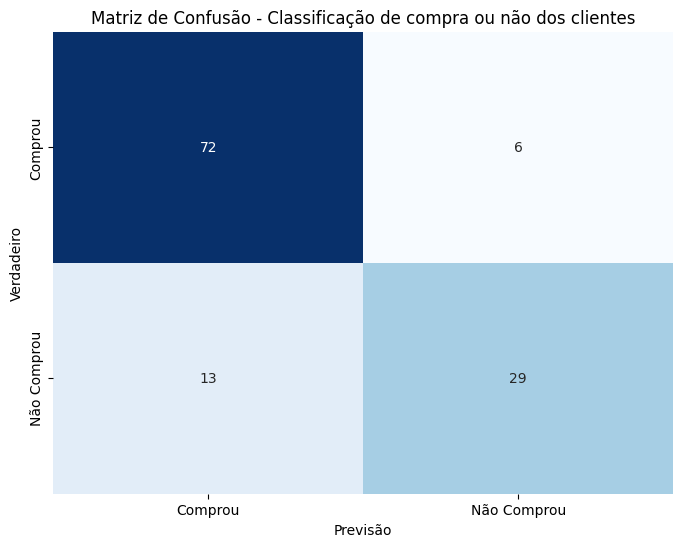

In [50]:
plt.figure(figsize=(8,6))
print(df.info())
# sns.heatmap(informação a ser exibida, exibir valores, cor, cbar, rotulos dos eixos)
sns.heatmap(cm,annot= True,fmt='d',cmap='Blues',cbar=False,xticklabels=['Comprou','Não Comprou'],yticklabels=['Comprou','Não Comprou'])
plt.xlabel('Previsão')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão - Classificação de compra ou não dos clientes')
plt.show()

In [51]:
acc = accuracy_score(y_teste,y_prev)
acc

0.8416666666666667

In [52]:
prec = precision_score(y_teste,y_prev)
prec

np.float64(0.8285714285714286)

F1_score

F1_score é a métrica mais completa para avaliar um modelo de machine learning pois leva em consideração além dos verdadeiros positivos e verdadeiros negativos, os falsos positivos e falso negativo

In [55]:
f1 = f1_score(y_teste, y_prev)
f1

np.float64(0.7532467532467533)

C:\Users\thale\AppData\Local\Temp\ipykernel_41112\4120565055.py:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(_x[_y == j, 0], _x[_y == j, 1],


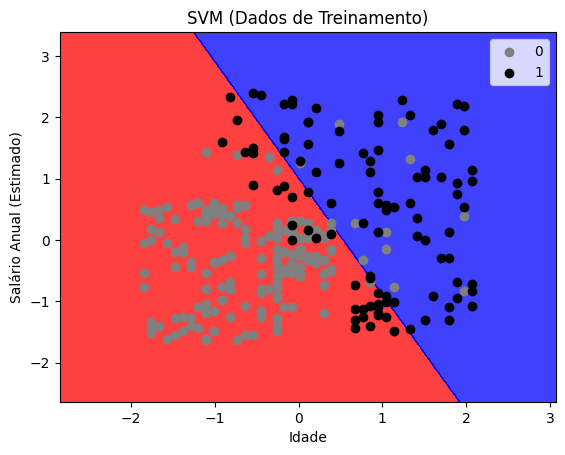

In [57]:
_x, _y = x_treino, y_treino
x1, x2 = np.meshgrid(np.arange(start = _x[:, 0].min() - 1, stop = _x[:, 0].max() + 1, step = 0.01),
                     np.arange(start = _x[:, 1].min() - 1, stop = _x[:, 1].max() + 1, step = 0.01))
plt.contourf(x1, x2, algoritmo.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'blue')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate(np.unique(_y)):
    plt.scatter(_x[_y == j, 0], _x[_y == j, 1],
                c = ListedColormap(('gray', 'black'))(i), label = j)
plt.title('SVM (Dados de Treinamento)')
plt.xlabel('Idade')
plt.ylabel('Salário Anual (Estimado)')
plt.legend()
plt.show()

Gerando visualização dos dados de teste

C:\Users\thale\AppData\Local\Temp\ipykernel_41112\1449561589.py:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(_x[_y == j, 0], _x[_y == j, 1],


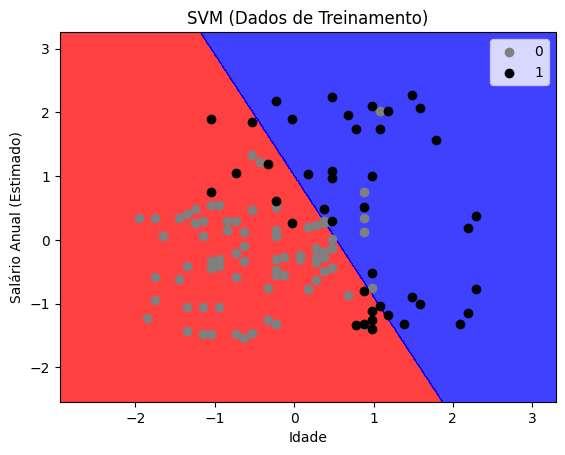

In [59]:
_x, _y = x_teste, y_teste
x1, x2 = np.meshgrid(np.arange(start = _x[:, 0].min() - 1, stop = _x[:, 0].max() + 1, step = 0.01),
                     np.arange(start = _x[:, 1].min() - 1, stop = _x[:, 1].max() + 1, step = 0.01))
plt.contourf(x1, x2, algoritmo.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'blue')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate(np.unique(_y)):
    plt.scatter(_x[_y == j, 0], _x[_y == j, 1],
                c = ListedColormap(('gray', 'black'))(i), label = j)
plt.title('SVM (Dados de Treinamento)')
plt.xlabel('Idade')
plt.ylabel('Salário Anual (Estimado)')
plt.legend()
plt.show()

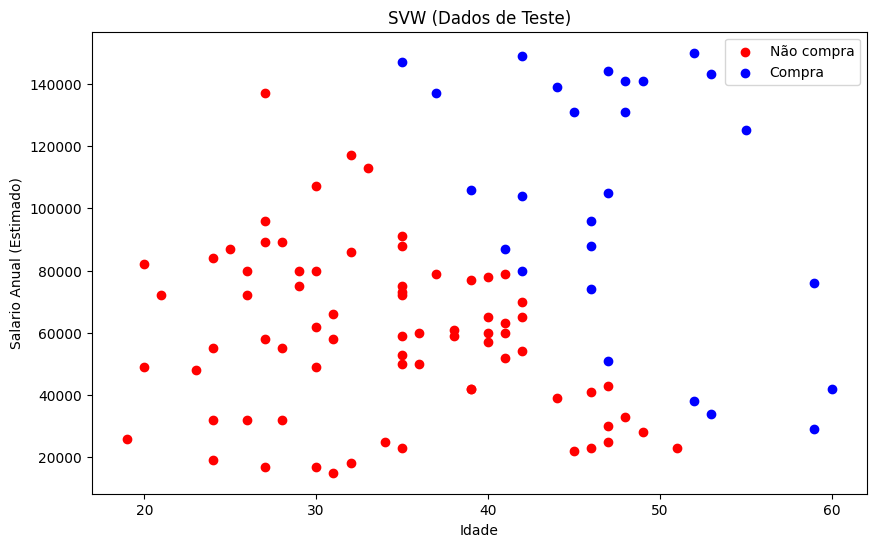

In [63]:
#Aplicando transformação nos dados
x = df.iloc[:, [2, 3]].values
y = df.iloc[:, -1].values

# Divisão da amostra
from sklearn.model_selection import train_test_split
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.25, random_state=3)

# Padronização dos dados
sc = StandardScaler()
x_treino = sc.fit_transform(x_treino)
x_teste = sc.transform(x_teste)

# Treinamento do modelo SVM
algoritmo = SVC(kernel='linear', random_state=3)
algoritmo.fit(x_treino, y_treino)

# Previsão dos resultados
y_prev = algoritmo.predict(x_teste)
#Inversão da escala para os dados de teste
x_teste_inverse = sc.inverse_transform(x_teste)

#Visualização dos resultados dos dados de teste
plt.figure(figsize=(10,6))

#Pontos para as duas classes
plt.scatter(x_teste_inverse[y_prev == 0,0], x_teste_inverse[y_prev == 0,1],c='red'
            ,label='Não compra')
plt.scatter(x_teste_inverse[y_prev == 1,0], x_teste_inverse[y_prev == 1,1],c='blue'
            ,label='Compra')

plt.title('SVW (Dados de Teste)')
plt.xlabel('Idade')
plt.ylabel('Salario Anual (Estimado)')
plt.legend()
plt.show()
